In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [75]:
pip install imblearn

In [76]:
fp = pd.read_csv("resp_data.csv")
fp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [77]:
#Exploring data to find patterns of the dataset
fp.describe

<bound method NDFrame.describe of          Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0   6/16/20

In [78]:
fp.info

<bound method DataFrame.info of          Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0   6/16/2014

In [79]:
#Check Null values
fp.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [80]:
fp.duplicated().sum()

0

In [81]:
# Identify categorical and numerical columns
categorical_cols = fp.select_dtypes(include=['object']).columns
numerical_cols = fp.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
Numerical columns: Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')


#### PREPROCESSING

## Preprocessing to ensure that the dataset is clean, consistent, and suitable for analysis and modeling tasks.

In [82]:
import pandas as pd

def onehot_encode(fp, column):
    fp = fp.copy()
    dummies = pd.get_dummies(fp[column], prefix=column)
    fp = pd.concat([fp, dummies], axis=1)
    fp = fp.drop(column, axis=1)
    return fp


In [83]:
def preprocess_inputs(fp):
    fp = fp.copy()

    #Drop ID column
    fp = fp.drop('Id', axis = 1)

    #Fill missing values in income column with mean value
    fp['Income'] = fp['Income'].fillna(fp['Income'].mean())

    # Date encoding
    fp['Dt_Customer'] = pd.to_datetime(fp['Dt_Customer'])
    fp['Year_Customer'] = fp['Dt_Customer'].apply(lambda x: x.year)
    fp['Month_Customer'] =fp['Dt_Customer'].apply(lambda x: x.month)
    fp['Day_Customer'] = fp['Dt_Customer'].apply(lambda x: x.day)
    fp= fp.drop('Dt_Customer', axis=1)

    # One-hot encoding
    for column in ['Education', 'Marital_Status']:
        fp = onehot_encode(fp, column=column)
    

    # Split df into X and y
    y = fp['Response']
    X = fp.drop('Response', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test


In [84]:
X_train, X_test, y_train, y_test = preprocess_inputs(fp)

In [85]:
X_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1747,-0.844494,-1.527550,-0.829730,-0.920661,0.947035,-0.877256,-0.630718,-0.708500,-0.263584,-0.564728,-0.483190,-0.671957,-1.094639,-0.564987,-1.157754,1.118736,-0.07598,-1.521949,1.548583,1.428991,-0.309414,-0.163860,0.987325,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,1.253193,-0.532111,-0.578332,-0.201191,-0.025262
115,-1.183546,0.721398,-0.829730,0.902062,-1.546614,0.044258,0.221947,0.723377,0.164725,-0.493713,1.879857,0.324382,1.056680,-0.220681,1.570285,-0.117762,-0.07598,-0.056991,1.264984,1.202547,-0.309414,-0.163860,0.987325,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,1.253193,-0.532111,-0.578332,-0.201191,-0.025262
1739,0.596476,-0.917343,1.020934,-0.920661,0.947035,-0.886203,-0.630718,-0.726682,-0.542917,-0.659416,-0.749986,-0.671957,-1.094639,-0.909293,-1.157754,0.706570,-0.07598,-0.056991,-0.153013,-0.156113,-0.309414,-0.163860,0.987325,-0.435524,-0.532111,-0.025262,-0.035737,3.030152,-0.797962,-0.532111,-0.578332,-0.201191,-0.025262
336,0.342187,-0.660546,1.020934,-0.920661,-1.205019,-0.838487,-0.580562,-0.653952,-0.636028,-0.635744,-0.788100,-0.173787,-0.736086,-0.909293,-0.854639,0.706570,-0.07598,1.407967,-0.153013,-1.175108,-0.309414,-0.163860,-1.012837,-0.435524,1.879306,-0.025262,-0.035737,-0.330017,1.253193,-0.532111,-0.578332,-0.201191,-0.025262
2031,-1.268309,0.345422,-0.829730,-0.920661,1.391110,0.667548,-0.655797,-0.131203,-0.170474,0.003397,2.108539,-0.671957,2.490892,-0.564987,0.660939,0.706570,-0.07598,-0.056991,-1.287411,-1.175108,-0.309414,-0.163860,0.987325,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,1.253193,-0.532111,-0.578332,-0.201191,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.596476,0.891360,-0.829730,-0.920661,-0.248550,1.395216,0.447653,1.809786,0.742013,0.382147,-0.578474,-0.671957,0.698127,1.156544,1.267170,-0.942094,-0.07598,-0.056991,-0.153013,-1.514773,-0.309414,-0.163860,-1.012837,2.296084,-0.532111,-0.025262,-0.035737,-0.330017,-0.797962,1.879306,-0.578332,-0.201191,-0.025262
905,-1.183546,0.524328,-0.829730,0.902062,-0.351029,0.038294,-0.279621,-0.526674,-0.319451,-0.659416,2.813641,-0.173787,1.056680,0.467931,-0.854639,0.294404,-0.07598,-1.521949,-1.003812,-0.835443,3.231912,-0.163860,-1.012837,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,1.253193,-0.532111,-0.578332,-0.201191,-0.025262
1096,-0.420679,0.027379,1.020934,0.902062,-0.009433,-0.880238,-0.630718,-0.699408,-0.654650,-0.659416,-0.769043,-0.671957,-1.094639,-0.909293,-1.157754,0.706570,-0.07598,1.407967,1.548583,-1.627995,3.231912,-0.163860,-1.012837,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,-0.797962,1.879306,-0.578332,-0.201191,-0.025262
235,0.172661,-1.149443,1.020934,0.902062,-1.341657,-0.802700,-0.630718,-0.681226,-0.561539,-0.612072,-0.673759,0.822551,-0.736086,-0.564987,-0.551523,-0.529928,-0.07598,1.407967,-0.720212,0.296774,3.231912,-0.163860,-1.012837,-0.435524,-0.532111,-0.025262,-0.035737,-0.330017,-0.797962,-0.532111,1.729110,-0.201191,-0.025262


### TRAINING:MODEL

In [86]:
def logistic_regression(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Logistic Regression Accuracy: 0.8482142857142857
Logistic Regression AUC: 0.8505705806767424
Confusion Matrix:
[[541  13]
 [ 89  29]]


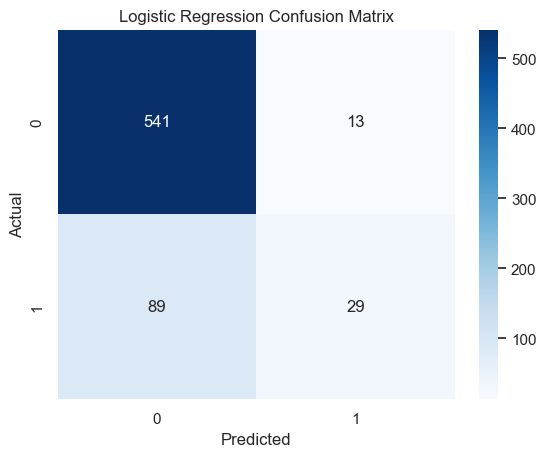

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       554
           1       0.69      0.25      0.36       118

    accuracy                           0.85       672
   macro avg       0.77      0.61      0.64       672
weighted avg       0.83      0.85      0.82       672



In [87]:
logistic_regression(X_train, y_train, X_test, y_test)

In [88]:
def random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Random Forest Accuracy: {accuracy}")
    print(f"Random Forest AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Random Forest Accuracy: 0.8526785714285714
Random Forest AUC: 0.8588386465153278
Confusion Matrix:
[[549   5]
 [ 94  24]]


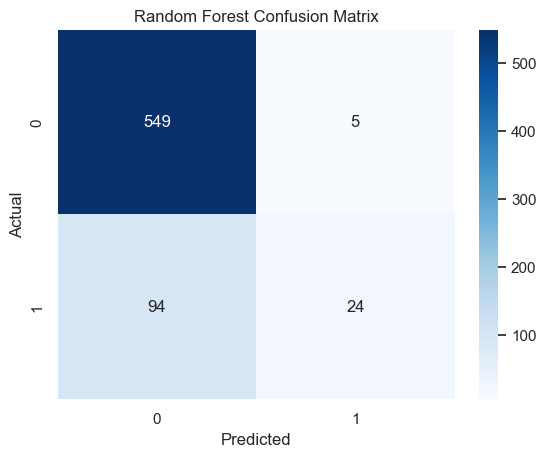

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       554
           1       0.83      0.20      0.33       118

    accuracy                           0.85       672
   macro avg       0.84      0.60      0.62       672
weighted avg       0.85      0.85      0.81       672



In [89]:
random_forest(X_train, y_train, X_test, y_test)

SVM Accuracy: 0.8422619047619048
SVM AUC: 0.8588233494462462
Confusion Matrix:
[[552   2]
 [104  14]]


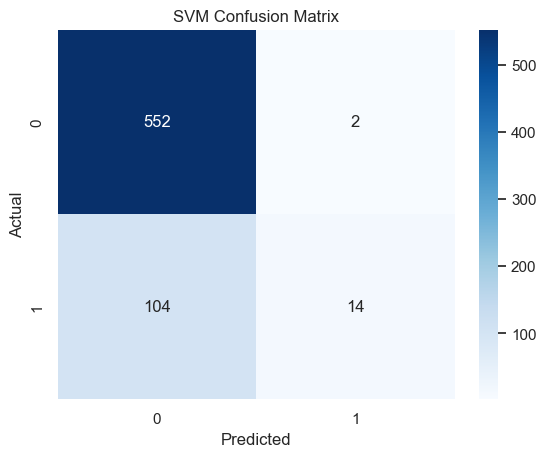

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       554
           1       0.88      0.12      0.21       118

    accuracy                           0.84       672
   macro avg       0.86      0.56      0.56       672
weighted avg       0.85      0.84      0.79       672



In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def svm_classifier(X_train, y_train, X_test, y_test):
    # Initialize Support Vector Classifier
    svm = SVC(probability=True, random_state=1)
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = svm.predict(X_test)
    y_pred_prob = svm.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"SVM Accuracy: {accuracy}")
    print(f"SVM AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('SVM Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

svm_classifier(X_train, y_train, X_test, y_test)


Gradient Boosting Accuracy: 0.8571428571428571
Gradient Boosting AUC: 0.8797956311570703
Confusion Matrix:
[[538  16]
 [ 80  38]]


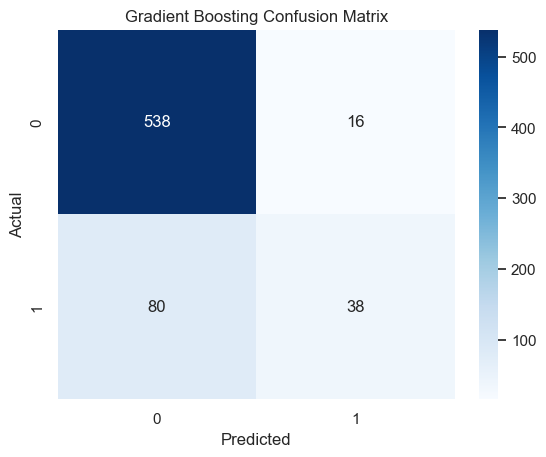

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       554
           1       0.70      0.32      0.44       118

    accuracy                           0.86       672
   macro avg       0.79      0.65      0.68       672
weighted avg       0.84      0.86      0.83       672



In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize GradientBoostingClassifier
    gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
    
    # Train the model
    gb.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = gb.predict(X_test)
    y_pred_prob = gb.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Gradient Boosting Accuracy: {accuracy}")
    print(f"Gradient Boosting AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

gradient_boosting(X_train, y_train, X_test, y_test)


### MODEL PERFORMANCE SUMMARY

In [92]:
def summarize_model_performance(models, X_train, y_train, X_test, y_test):
    summary = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        summary.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc,
            "Confusion Matrix": cm,
            "Classification Report": report
        })
    
    return pd.DataFrame(summary)

# Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "SVM": SVC(probability=True, random_state=1)
}

# Summarize performance
performance_summary = summarize_model_performance(models, X_train, y_train, X_test, y_test)
print(performance_summary)

                 Model  Accuracy       AUC       Confusion Matrix  \
0  Logistic Regression  0.848214  0.850571  [[541, 13], [89, 29]]   
1        Random Forest  0.852679  0.858839   [[549, 5], [94, 24]]   
2    Gradient Boosting  0.857143  0.879796  [[538, 16], [80, 38]]   
3                  SVM  0.842262  0.858823  [[552, 2], [104, 14]]   

                               Classification Report  
0  {'0': {'precision': 0.8587301587301587, 'recal...  
1  {'0': {'precision': 0.8538102643856921, 'recal...  
2  {'0': {'precision': 0.8705501618122977, 'recal...  
3  {'0': {'precision': 0.8414634146341463, 'recal...  
